# Climate Change on Agriculture

Group 1

As global temperatures rise and precipitation patterns change, agricultural practices are forced to adapt. Understanding how climate and adaptation strategies impact crop yields and economic outcomes is crucial for mitigating the effects of climate change on food production.
By analyzing how different regions are responding to climate variability, we can identify successful strategies that could be applied globally to ensure food security.

#### The data
This dataset includes agricultural data from 1990 to 2024, covering a wide range of crops, countries, and regions. It tracks factors like temperature, precipitation, CO2 emissions, crop yields, and economic impacts.
Size of Data: The dataset contains 10,000 records across 10 countries, with 10 attributes per entry, including crop types, climate data, and adaptation strategies.

Attributes: 
- Year (1990 - 2024)
- Country
- Crop Type (barley, coffee, corn, cotton, fruits, rice, soybeans, sugarcane, vegetables, wheat)
- Average Temperature (°C)
- Total Precipitation (mm)
- CO2 Emissions (metric tons)
- Crop Yield (metric tons per hectare)
- Extreme Weather Events (0 - 10)
- Irrigation Access (0 - 100)
- Pesticide Use (kilogram per hectare)
- Fertilizer Use (kilogram per hectare)
- Soil Health Index (0 - 100)
- Adaption Strategies (crop rotation, drought-resistant crops, organic farming, water management, no adaptation)
- Economic Impact (in million USD)

In [15]:
# data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import plotly.graph_objects as go

data = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

data.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

## Global Overview of Climate Change and Agriculture


This can be done in a number of ways. We basically just want to show the trends of the data to show viewers what's going on. We could start with showing AVG TEMP AND AVG PERCIPITATION from beginning of data to most recently.

Show rise in extreme weather events and CEO2 emissions. This would then give context to the below visualizations as viewers would see a strong correlation between increase in extreme weather and emissions and a decrease in crop yield. 

#### Visualization 1: Global Crop Yield Over Time

Map of crop yield over time across the globe

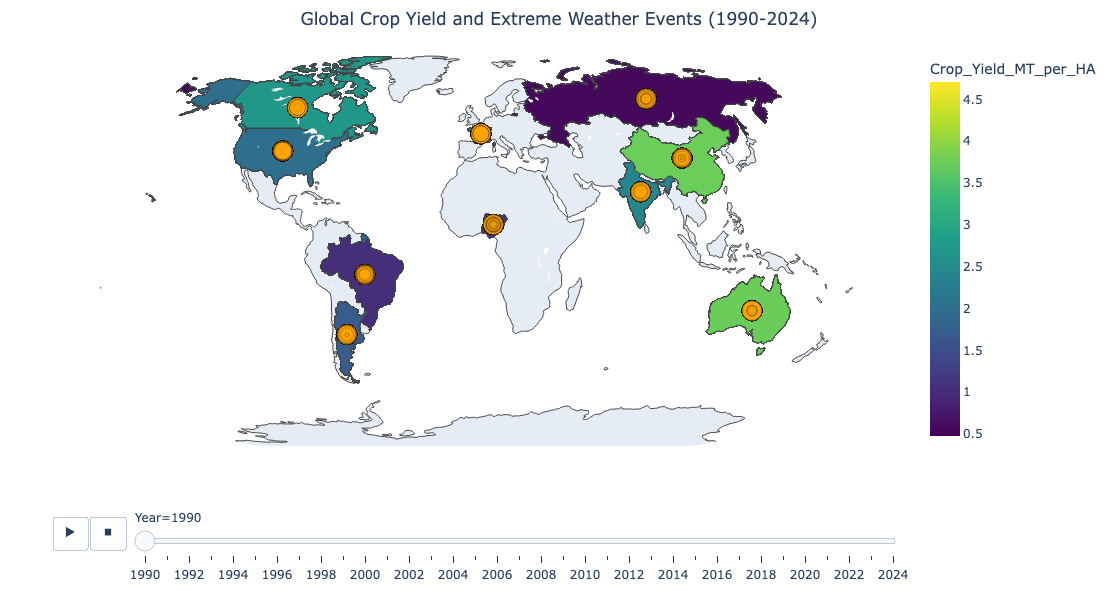

In [14]:
# Convert 'Year' column to integer and sort chronologically
data['Year'] = data['Year'].astype(int)
data = data.sort_values(by='Year')

# Convert 'Year' to string for the animation frame
data['Year'] = data['Year'].astype(str)

# Calculate min and max crop yields per year for dynamic color range
min_max_yields = data.groupby('Year')['Crop_Yield_MT_per_HA'].agg(['min', 'max']).to_dict('index')

# Function to set dynamic color range for each year
def get_color_range(year):
    return [min_max_yields[year]['min'], min_max_yields[year]['max']]

# Create the choropleth map for crop yield
fig = px.choropleth(
    data,
    locations="Country",
    locationmode="country names",
    color="Crop_Yield_MT_per_HA",
    hover_name="Country",
    animation_frame="Year",
    title="Global Crop Yield and Extreme Weather Events (1990-2024)",
    color_continuous_scale="Viridis"
)

# Adjust color scale dynamically for each frame
for frame in fig.frames:
    year = frame.name
    color_range = get_color_range(year)
    for data_trace in frame.data:
        data_trace.update(zmin=color_range[0], zmax=color_range[1])

# Add bubble markers for extreme weather events, scaled down for better visibility
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    fig.add_trace(go.Scattergeo(
        locationmode='country names',
        locations=year_data['Country'],
        text=year_data['Country'] + '<br>Extreme Weather Events: ' + year_data['Extreme_Weather_Events'].astype(str),
        marker=dict(
            size=year_data['Extreme_Weather_Events'] * 2,  # Adjusted scaling factor
            color='orange',
            opacity=0.6,
            line=dict(width=0.5, color='black')
        ),
        showlegend=False  # Hide the legend for extreme weather events
    ))

# Update layout for better presentation
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    title_x=0.5,
    width=1000,
    height=600,
    legend_title="Crop Yield (MT per HA)",
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the interactive map
fig.show()


#### Visualization 2: Temperature on Crop Yield
This chart identifies temperature thresholds where crop yields decline, while also taking into account severe weather events

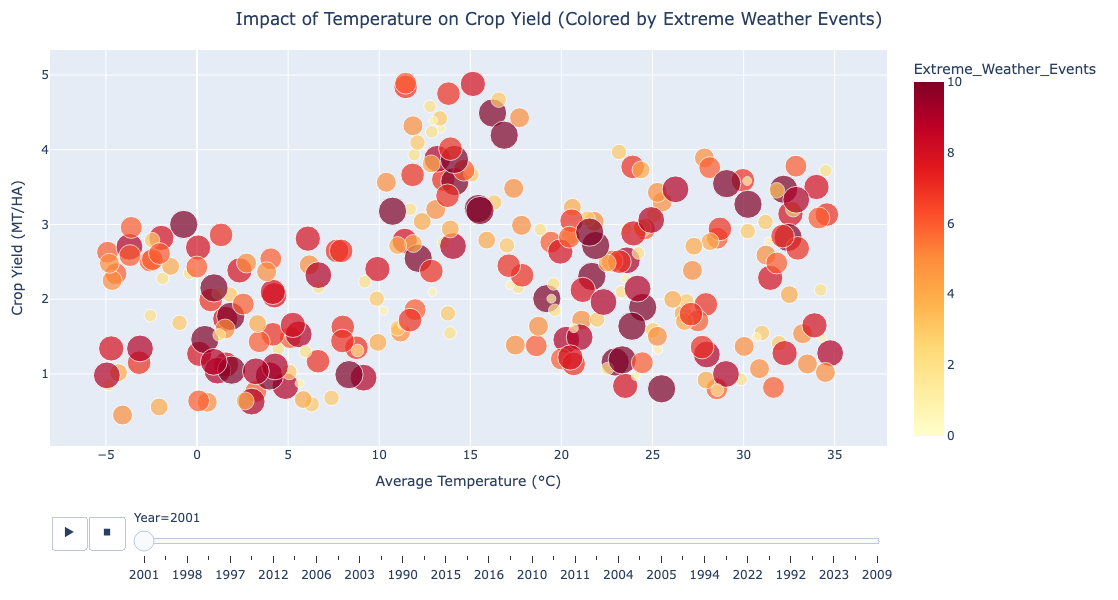

In [16]:
fig = px.scatter(
    data,
    x="Average_Temperature_C",
    y="Crop_Yield_MT_per_HA",
    color="Extreme_Weather_Events",
    size="Extreme_Weather_Events",
    hover_name="Country",
    animation_frame="Year",
    title="Impact of Temperature on Crop Yield (Colored by Extreme Weather Events)",
    color_continuous_scale="YlOrRd",
    labels={
        "Average_Temperature_C": "Average Temperature (°C)",
        "Crop_Yield_MT_per_HA": "Crop Yield (MT/HA)"
    }
)

fig.update_layout(
    width=900,
    height=600,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()


## Impact on Crop Yields

Compare how different crop yields (3 top crops, rice wheat corn, other combo) over time. It shouldn't be a straight line, but it should def decrease over time.

How have some regions done better and some done much worse as weather patterns change over time. Inevitably, the varying weather will lengthen some growing seasons and shorten others. Show this in a visualization.

## Adaptions Strategies in Action and their Results

Show where different adaption strategies are being implemented. The different strategies will depend on what the changing weather in messing up. We can then compare/analyze how well they have worked to mitigate effects of changing climate.

Identify which have worked the best for improving/maintaing SOIL HEALTH AND/or crop yields.

## Economic Costs

Now let's see the economic impact on regions that did implement adaption strategies vs those that did not. Would be super cool to implement some kind of COST-BENEFIT ANALYSIS of different strategies that worked and then their impact on productivity/economy to see if they are worth while solutions, etc.

## Effects of Modern Technology 

Would be potentially interesting and important to draw attention to how access to IRRIGATION, FERTILIZER, PESTICIDES, etc affects crop yields. We would probably find that countries with better access to more modern tech would have an easier time mitigating affects of climate change.

This could then support a suggestion/solution for our findings. For example, if we are able to show that access to modern tech in a key piece of mitigating crop yield decline. Then we could propose global policy to address spreading successful adaption strategies to countries that do not have access atm. On the other hand, if we find that modern tech has no positive outcomes (unlikely, but possible), we could draw a narrative that humanity has doomed itself and then propose how the world has to work together or whatever to stop emissions (elect better politicians, write to local gov, become activits, etc).

## Regional Examples

This is where we could end on a positive where we could exemplify where specific places have had success implementing adaption strategies and maintaining yields and boasting a strong economy. This could come from look at patterns over time like if a country/region had been hit by a tsunami the year before, how have water management systems managed to restore some of the crop yield after previous devastation. 